In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb
import tensorflow.keras.datasets.imdb as imdb


In [3]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [4]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [5]:
# Inspect the shape of the data

x_train.shape

(25000,)

In [6]:
# Display the first dataset element input
# Notice encoding
x_train[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [7]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [12]:
# Load the dataset with defaults
imdb.load_data(path="imdb.npz", index_from=3)

# ~/.keras/dataset/

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [13]:
# Limit the vocabulary to the top 500 words using num_words
imdb.load_data(num_words=500)


((array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 

In [14]:
# Ignore the top 10 most frequent words using skip_top
imdb.load_data(skip_top=10, oov_char=2)


((array([list([2, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 22665, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 21631, 336, 385, 39, 2, 172, 4536, 1111, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2025, 19, 14, 22, 2, 1920, 4613, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 2, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2223, 5244, 16, 480, 66, 3785, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 10311, 2, 2, 107, 117, 5952, 15, 256, 2, 31050, 2, 3766, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 12118, 1029, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 2, 194, 7486, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 2, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([2, 19

In [15]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(maxlen=500)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [16]:
# Use '1' as the character that indicates the start of a sequence

imdb.load_data(start_char=1)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

#### Explore the dataset word index

In [17]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()

In [20]:
# View the word index as a dictionary,
# accounting for index_from.
index_from=3
imdb_word_index = { key : value+index_from for key,  value in imdb_word_index.items()}

In [21]:
# Retrieve a specific word's index
imdb_word_index['simpsonian']


52256

In [24]:
# View an input sentence

inv_imdb_word_index = {value : key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [25]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [26]:
# Load the imdb data set

import tensorflow.keras.datasets.imdb as imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data()

#### Preprocess the data with padding

In [27]:
# Inspect the input data shape

x_train.shape

(25000,)

In [29]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')


In [ ]:
# Inspect the output data shape

padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [32]:
# Import numpy 

import numpy as np

In [35]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, -1)

In [37]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype="float32")
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [38]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [39]:
# Look at the dataset

tf_x_train

<tf.Tensor: id=1, shape=(25000, 300, 1, 1), dtype=float32, numpy=
array([[[[1.000e+00]],

        [[1.400e+01]],

        [[2.200e+01]],

        ...,

        [[0.000e+00]],

        [[0.000e+00]],

        [[0.000e+00]]],


       [[[1.000e+00]],

        [[1.940e+02]],

        [[1.153e+03]],

        ...,

        [[0.000e+00]],

        [[0.000e+00]],

        [[0.000e+00]]],


       [[[1.000e+00]],

        [[1.400e+01]],

        [[4.700e+01]],

        ...,

        [[0.000e+00]],

        [[0.000e+00]],

        [[0.000e+00]]],


       ...,


       [[[1.000e+00]],

        [[1.100e+01]],

        [[6.000e+00]],

        ...,

        [[0.000e+00]],

        [[0.000e+00]],

        [[0.000e+00]]],


       [[[1.000e+00]],

        [[1.446e+03]],

        [[7.079e+03]],

        ...,

        [[0.000e+00]],

        [[0.000e+00]],

        [[0.000e+00]]],


       [[[1.000e+00]],

        [[1.700e+01]],

        [[6.000e+00]],

        ...,

        [[0.000e+00]],

        [[

In [41]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: id=9, shape=(25000, 300, 1), dtype=bool, numpy=
array([[[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]],

       [[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]],

       [[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]],

       [[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]],

       [[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [42]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [44]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0], [1], [5], [500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: id=25, shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.04191836,  0.02123492, -0.02401302, -0.00999371,
           0.03579087,  0.00297638,  0.01599994,  0.04528031,
          -0.03616648, -0.02267493, -0.04835203, -0.01230937,
           0.03967936,  0.02681109,  0.00560464,  0.0202579 ]],

        [[ 0.02077377, -0.03204719, -0.01047985, -0.0420265 ,
          -0.04342743, -0.04919499,  0.01851857, -0.02454441,
          -0.02268289,  0.02879827,  0.0328556 ,  0.03475242,
          -0.00860637, -0.02128126,  0.0105202 ,  0.01625637]],

        [[ 0.02418907, -0.01105183,  0.0222334 , -0.03945222,
          -0.00632809, -0.0206384 ,  0.00179924,  0.04107325,
           0.04411891,  0.0302385 , -0.00098325,  0.03366739,
           0.00628578, -0.02859955,  0.00287934,  0.04383894]],

        [[-0.01438925, -0.02993803, -0.03321099, -0.02570802,
           0.02168244,  0.03191468, -0.00421786, -0.03703398,
           0.03056628,  0.00261645, -0.03867071, -0.04823922,

In [45]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[ 0.04191836,  0.02123492, -0.02401302, ...,  0.02681109,
         0.00560464,  0.0202579 ],
       [ 0.02077377, -0.03204719, -0.01047985, ..., -0.02128126,
         0.0105202 ,  0.01625637],
       [ 0.02242395, -0.01963006,  0.04835323, ...,  0.02942746,
         0.04447278, -0.0178904 ],
       ...,
       [-0.03268632, -0.02324073,  0.04384495, ...,  0.04555926,
         0.03037654,  0.03369268],
       [ 0.04219618, -0.00267984,  0.02888348, ..., -0.01948899,
        -0.00160849,  0.0479156 ],
       [-0.01438925, -0.02993803, -0.03321099, ..., -0.02837555,
        -0.02140236,  0.04425584]], dtype=float32)

In [47]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14,:]

array([-0.03576611,  0.00633291,  0.03972809,  0.0019726 , -0.02853885,
       -0.03727058, -0.0262893 , -0.01029206,  0.03322661,  0.01908747,
        0.01594161, -0.01437103,  0.0291074 ,  0.03657288, -0.04256462,
        0.00522272], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [49]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [51]:
# Apply this layer to the sequence and see the _keras_mask property
masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: id=47, shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [2]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()


17465344/17464789 [==============================] - 0s 0us/step


In [4]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [5]:
# Get the word index

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [8]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[0] if index>2]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',
 'was',
 'so',
 'sad',


#### Build an Embedding layer into a model

In [9]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())

In [10]:
# Specify an embedding dimension

embedding_dim=16

In [13]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [18]:
# Functional API refresher: use the Model to build the same model

review_sequence = tf.keras.layers.Input((None,))
embedding_sequence = tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False)(review_sequence)
average_sequence = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(1, activation="sigmoid", name="out")(average_sequence)
model = tf.keras.Model(inputs =review_sequence, outputs=positive_probability )

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
out (Dense)                  (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [20]:
# Compile the model with a binary cross-entropy loss
model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')


In [23]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.6813 - acc: 0.6314 - val_loss: 0.0170 - val_acc: 0.6266
Epoch 2/5
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.6451 - acc: 0.7248 - val_loss: 0.0160 - val_acc: 0.7234
Epoch 3/5
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.5953 - acc: 0.7798 - val_loss: 0.0146 - val_acc: 0.7734
Epoch 4/5
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.5453 - acc: 0.8115 - val_loss: 0.0134 - val_acc: 0.7984
Epoch 5/5
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.4995 - acc: 0.8271 - val_loss: 0.0124 - val_acc: 0.8156


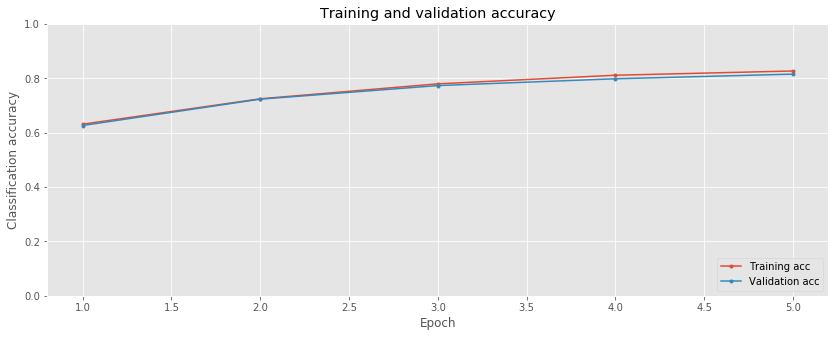

In [25]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['acc']
val_acc  = history_dict['val_acc']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [26]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [33]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [34]:
# Create a SimpleRNN layer and test it

simplernn_layer = tf.keras.layers.SimpleRNN(units=16)

In [36]:
# Note that only the final cell output is returned
sequence = tf.constant([[[1.,1.,], [2.,2.], [56.,10.]]])
layer_output = simplernn_layer(sequence)
layer_output


<tf.Tensor: id=14556, shape=(1, 16), dtype=float32, numpy=
array([[-0.9996368 , -1.        ,  1.        , -1.        , -1.        ,
         1.        , -0.779325  , -1.        , -1.        , -1.        ,
        -1.        ,  1.        , -0.99996614, -1.        ,  1.        ,
        -1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [37]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [38]:
# Load the dataset

(x_train, y_train), (x_test, y_test)= get_and_pad_imdb_dataset(maxlen=500)

In [39]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [40]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [42]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [43]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    tf.keras.layers.LSTM(units=16),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [44]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 694s 28ms/sample - loss: 0.4626 - accuracy: 0.7864
Epoch 2/3
25000/25000 [==============================] - 676s 27ms/sample - loss: 0.2696 - accuracy: 0.8955
Epoch 3/3
25000/25000 [==============================] - 676s 27ms/sample - loss: 0.2016 - accuracy: 0.9255


#### Plot learning curves

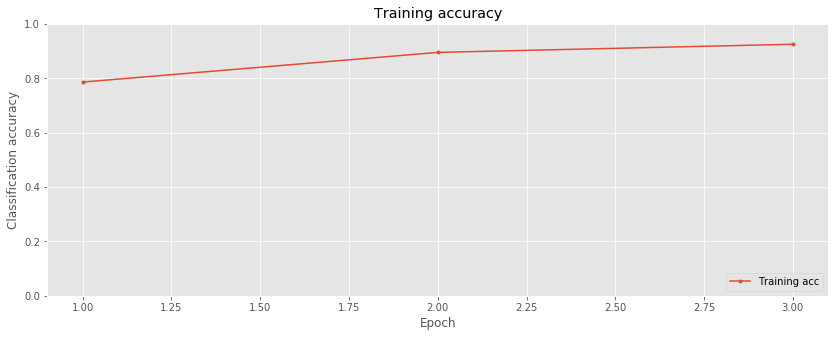

In [52]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
loss     = history_dict['loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [55]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value : key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index>2]

['this',
 'is',
 'one',
 'of',
 'the',
 'worst',
 'films',
 'i',
 'have',
 'seen',
 'in',
 'a',
 'while',
 'br',
 'br',
 'the',
 'problem',
 'is',
 'that',
 'it',
 "doesn't",
 'know',
 'whether',
 'it',
 'wants',
 'to',
 'be',
 'an',
 'intelligent',
 'political',
 'film',
 'or',
 'an',
 'exercise',
 'is',
 'as',
 'a',
 'result',
 'it',
 'fails',
 'on',
 'all',
 'accounts',
 'br',
 'br',
 'the',
 'acting',
 'is',
 'atrocious',
 'the',
 'narration',
 'off',
 'putting',
 'and',
 'the',
 'supposed',
 'symbolism',
 'pointless',
 'br',
 'br',
 'kinski',
 'is',
 'probably',
 'the',
 'best',
 'thing',
 'about',
 'this',
 'film',
 'but',
 'that',
 "isn't",
 'a',
 'good',
 'thing',
 'sure',
 'he',
 'has',
 'an',
 'intense',
 'and',
 'look',
 'but',
 'ultimately',
 'he',
 "can't",
 'actually',
 'act',
 'just',
 'look',
 'at',
 'how',
 'he',
 'when',
 'his',
 'mistress',
 'leaves',
 'br',
 'br',
 'really',
 "don't",
 'watch',
 'this',
 'film',
 'some',
 'say',
 'it',
 'needs',
 'repeat',
 'viewing

In [56]:
# Get the model prediction using model.predict()

model.predict(x_test[None, 0, :])

array([[0.09675044]], dtype=float32)

In [57]:
# Get the corresponding label

y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [2]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)


In [4]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [5]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()


#### Build stacked and bidirectional recurrent models

In [6]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [7]:
# Using Sequential, build a stacked LSTM model via return_sequences=True
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(
        layer = tf.keras.layers.LSTM(8), 
        backward_layer = tf.keras.layers.GRU(8, go_backwards = True),
        merge_mode='sum'
    ),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    tf.keras.layers.Bidirectional(
        layer = tf.keras.layers.LSTM(8, return_sequences=True), 
        merge_mode='concat'
    ),
    tf.keras.layers.GRU(units=8, return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


#### Compile and fit the model

In [10]:
# Compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train the model, saving its history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2023s 81ms/sample - loss: 0.4096 - accuracy: 0.8106
Epoch 2/3
25000/25000 [==============================] - 1916s 77ms/sample - loss: 0.2558 - accuracy: 0.9020
Epoch 3/3
25000/25000 [==============================] - 1849s 74ms/sample - loss: 0.2071 - accuracy: 0.9237


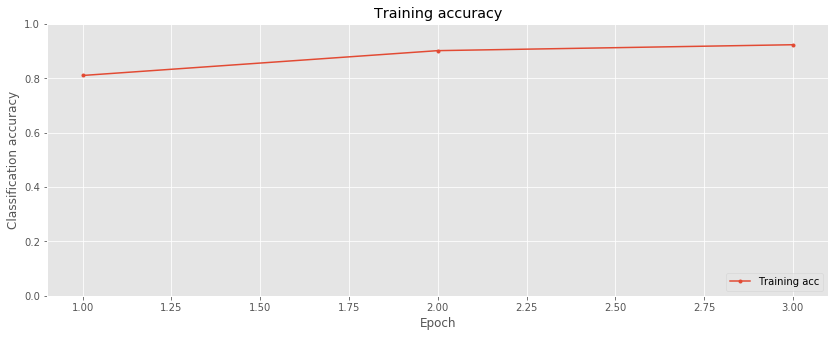

In [15]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
loss     = history_dict['loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);